# Content
- Overview
- Imports
- Load the Data
- Lenght of the Time Series
- From Text to Datetime
- Setting the Index
- Setting the Desired Frequency
- Handling Missing Values
- Simplifying the Dataset
- Splitting the Data
- White Noise
- Random Walk
- Stationarity
- Seasonality
- ACF
- PACF

# Overview
- We will transform the DataFrame in to a Time Series
- We will learn to set any attribute of the DataFrame as Index
- We will learn to set the Frequency of the Dataset to turn it into a Time Series
- We will learn to deal with missing values in Time Series Dataset
- We will learn to add or remove an attribute from the DataFrame
- We will learn to split the Time Series Dataset
- What is White Noise? Why is it important to know?
- What is Random Walk? What can we make of it? What is Market efficency? How does Randon Walk can help improve Market effiency?
- What Stationarity is? Weak-form(or Covarience) Stationarity and Strict Stationarity?
- We will learn to check for presence of Seasonality in our dataset
- Autocorrelation between past and present values of a Time Series
- Partial Autocorrelation betwen past and present values of a Time Series

# Imports

In [63]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# Argumented David-Fuller Test Analysis for Stationarity
import statsmodels.tsa.stattools as sts

# "Naive" Decomposition to check Seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF and PACF
import statsmodels.graphics.tsaplots as sgt

# Load the Data

In [2]:
raw_data_csv = pd.read_csv('Index2018.csv')

In [3]:
df_comp = raw_data_csv.copy()

In [4]:
df_comp.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1,1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
2,1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
3,1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
4,1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Length of the Time Series

In [5]:
df_comp['Date'].describe()

count           6277
unique          6277
top       2010-05-17
freq               1
Name: Date, dtype: object

# From Text to Datetime

In [6]:
df_comp['Date'] = pd.to_datetime(df_comp['Date'], dayfirst=True,) # By default mm/dd/yyyy

In [7]:
df_comp['Date'].describe()

count                    6277
unique                   6277
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: Date, dtype: object

In [8]:
df_comp.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1,1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
2,1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
3,1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
4,1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Setting the Index

In [9]:
df_comp.set_index('Date', inplace=True)

In [10]:
df_comp.head()

,spx,dax,ftse,nikkei
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Setting the Desired Frequency

In [11]:
df_comp = df_comp.asfreq('b') 
# We use b since our Dataset is recorded in daily basis and so we want pur frequency to be 'd' but d introduces holidays as
# which we don't want as Stock markets are open only on business days. Hence we use 'b'.
# 'h' for hourly
# 'd' for daily
# 'w' for weekly
# 'm' for montly
# 'a' for annually
# 'b' for business days
# check pandas documentation for more

In [12]:
df_comp.head()

,spx,dax,ftse,nikkei
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Handling Missing Values

In [13]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [14]:
# We don't have any missing value but if we had. We could to the following

In [15]:
# df_comp['spx'] = df_comp['spx'].fillna(method="ffill") # "bfill"

In [16]:
# df_comp['ftse'].fillna(value=df_comp['ftse'].mean())

# Simplyfing the Dataset

In [17]:
# Its just adding or removing columns and keeping only attribute needed

In [18]:
df_comp.drop(['ftse', 'dax','nikkei'], inplace=True, axis=1)

In [19]:
df_comp.head()

,spx
Date,
1994-01-07,469.899994
1994-01-10,475.269989
1994-01-11,474.130005
1994-01-12,474.170013
1994-01-13,472.470001


# Splitting the Data

In [20]:
size = int(len(df_comp)*0.8) # Here we are taking 80% of the Data

In [21]:
df_train = df_comp[:size] 

In [22]:
df_test = df_comp[size:]

In [23]:
df_train.tail()

,spx
Date,
2013-04-01,1562.170044
2013-04-02,1570.250000
2013-04-03,1553.689941
2013-04-04,1559.979980
2013-04-05,1553.280029


In [24]:
df_test.head()

,spx
Date,
2013-04-08,1563.069946
2013-04-09,1568.609985
2013-04-10,1587.729980
2013-04-11,1593.369995
2013-04-12,1588.849976


# White Noise

In [25]:
wn = np.random.normal(loc=df_train['spx'].mean(), scale=df_train['spx'].std(), size=len(df_train))
# we create an array of White Noise 

In [26]:
df_train['wn'] = wn
# we create a Datefame with that White noise

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_train.describe()

,spx,wn
count,5021.000000,5021.000000
mean,1091.651894,1097.116095
std,292.559174,296.804277
min,438.920013,48.756821
25%,914.619995,896.589678
50%,1144.650024,1098.341137
75%,1316.280029,1293.514782
max,1570.250000,2201.026774


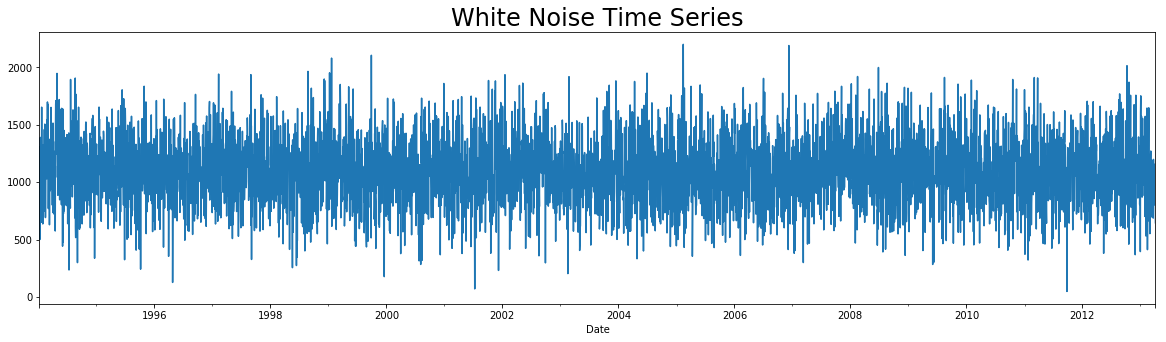

In [28]:
# plot the White Noise
df_train.wn.plot(figsize=(20,5))
plt.title("White Noise Time Series", size=24)
plt.show()

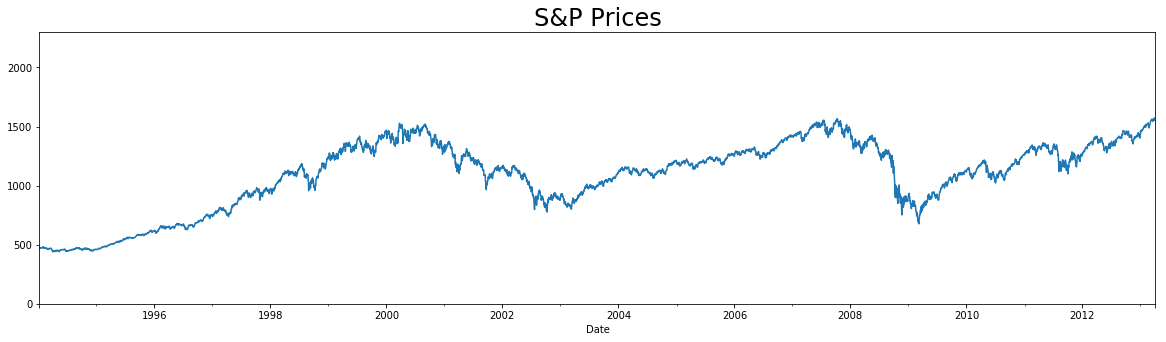

In [29]:
# plot the S&P Prices Noise
df_train.spx.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.ylim(0,2300)
plt.show()

# Random Walk

In [30]:
rw = pd.read_csv('RandWalk.csv')

In [31]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [32]:
rw.describe()

,price
count,7029.000000
mean,1269.648367
std,443.999180
min,574.382397
25%,931.488599
50%,1155.773451
75%,1488.957260
max,2715.508720


In [33]:
rw['date'] = pd.to_datetime(rw['date'], dayfirst=True)

In [34]:
rw.head()

,date,price
0,1994-01-07,1122.139662
1,1994-01-08,1135.238562
2,1994-01-09,1109.897831
3,1994-01-10,1080.347860
4,1994-01-11,1082.095245


In [35]:
rw.set_index('date', inplace=True)

In [36]:
rw = rw.asfreq('b')

In [37]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [38]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [39]:
df_train['rw'] = rw['price']

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_train.head()

,spx,wn,rw
Date,,,
1994-01-07,469.899994,1129.684267,1122.139662
1994-01-10,475.269989,1309.218640,1080.347860
1994-01-11,474.130005,501.697160,1082.095245
1994-01-12,474.170013,1133.040206,1083.639265
1994-01-13,472.470001,1390.500869,1067.146255


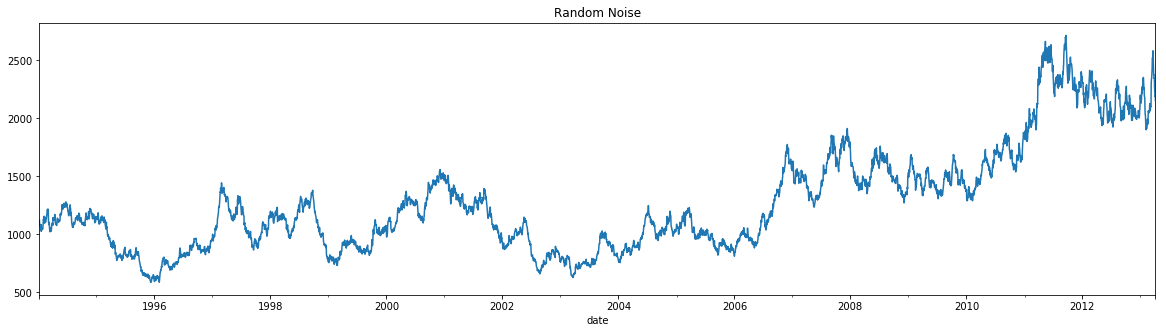

In [41]:
rw['price'].plot(figsize=(20,5))
plt.title("Random Noise")
plt.show()

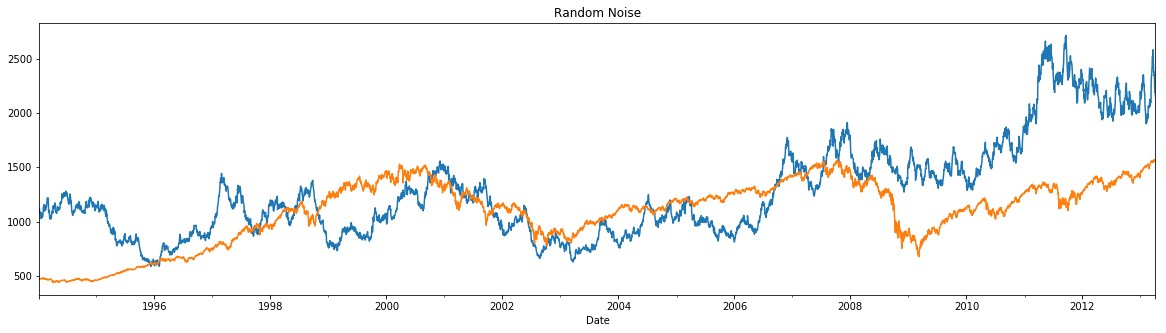

In [42]:
df_train['rw'].plot(figsize=(20,5))
df_train['spx'].plot(figsize=(20,5))
plt.title("Random Noise")
plt.show()

# Stationarity

In [44]:
sts.adfuller(df_train['spx'])

(-1.7369539896505504,
 0.41218023100845674,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.89644285227)

In [45]:
sts.adfuller(df_train['wn'])

(-70.71004092599031,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70957.73204802349)

In [48]:
sts.adfuller(df_train['rw'])

(-1.3286073927689686,
 0.61598491816174,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Seasonality

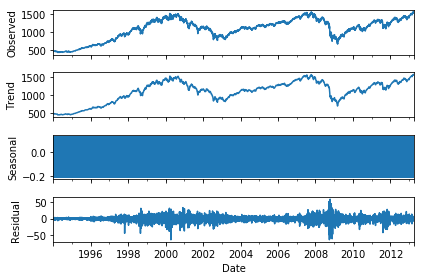

In [50]:
s_dec_additive = seasonal_decompose(df_train['spx'], model='additive')
s_dec_additive.plot()
plt.show()

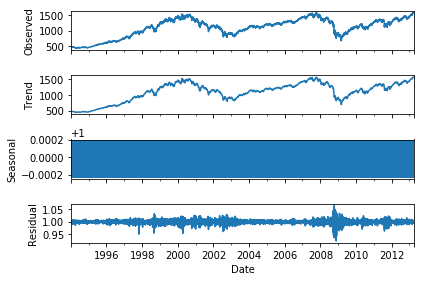

In [52]:
s_dec_multiplicative = seasonal_decompose(df_train['spx'], model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [53]:
# We observe there is no seasonality but some trend is observed in our dataset

# ACF

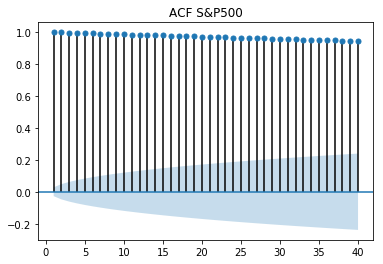

In [56]:
sgt.plot_acf(df_train['spx'], lags=40, zero=False)
plt.title("ACF S&P500")
plt.show()

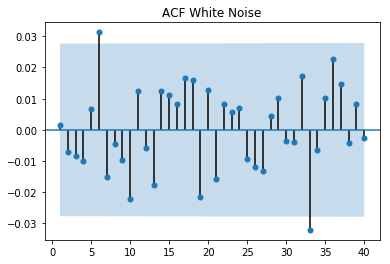

In [57]:
sgt.plot_acf(df_train['wn'], lags=40, zero=False)
plt.title("ACF White Noise")
plt.show()

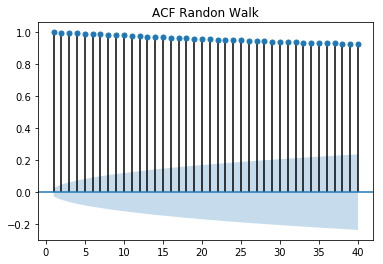

In [58]:
sgt.plot_acf(df_train['rw'], lags=40, zero=False)
plt.title("ACF Randon Walk")
plt.show()

# PACF

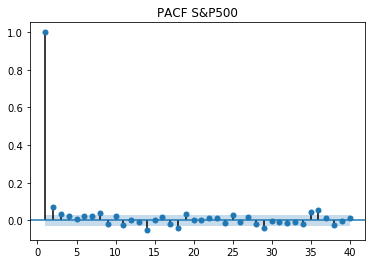

In [59]:
sgt.plot_pacf(df_train['spx'], lags=40, zero=False, method=('ols'))
plt.title("PACF S&P500")
plt.show()

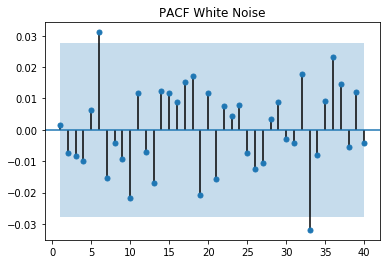

In [60]:
sgt.plot_pacf(df_train['wn'], lags=40, zero=False, method=('ols'))
plt.title("PACF White Noise")
plt.show()

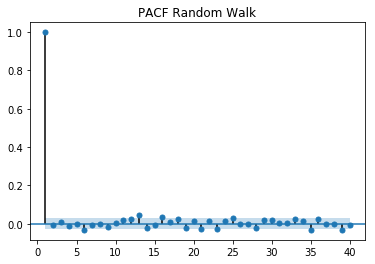

In [62]:
sgt.plot_pacf(df_train['rw'], lags=40, zero=False, method=('ols'))
plt.title("PACF Random Walk")
plt.show()